In [55]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [56]:
import numpy as np
import pandas as pd

In [57]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [58]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [59]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [60]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect= True)

In [61]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [62]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain_weather = session.query(measurement.date, measurement.prcp).filter(measurement.date >= "2016-08-23").\
filter(measurement.date <= "2017-08-23").all()

In [65]:
# Calculate the date 1 year ago from the last data point in the database
last_data_pt = dt.date(2017,8,23) -dt.timedelta(days=365)
print(last_data_pt)

2016-08-23


In [152]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(measurement.date, measurement.prcp).\
filter(measurement.date > last_data_pt).all()

In [161]:
# Create a dataframe from the query results and set the index to the date column
rain_df = pd.DataFrame(rain, columns=['date','percipitation'])
rain_df['date'] = pd.to_datetime(rain_df['date'])
rain_df.set_index('date', inplace = True)

In [162]:
# Sort the dataframe by date
rain_df = rain_df.sort_values(by='date', ascending=True)

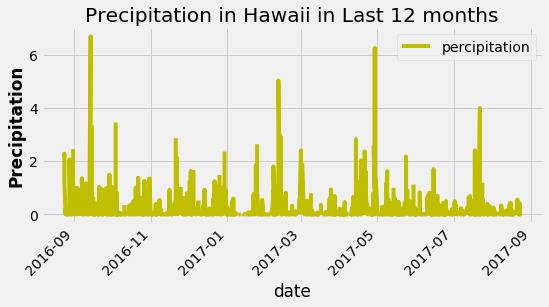

In [163]:
# Use Pandas Plotting with Matplotlib to plot the data
"""Note: what this means is to use the .plot() method on your dataframe variable,
and then format the labels with methods like plt.xlabel() and plt.title(). 

For example:
df.plot()
plt.xlabels()

As opposed to:
plt.bar()
plt.xlabels()

This is something you would never actually do. If you're importing matplotlib, you'd use
it to generate the plot, as well as the formatting. It's good practice, if you're importing a library,
to use it for everything you can use that library for. Every libarary you causes your program to take up
more memory, so use what you import.
"""

rain_data = rain_df.plot(figsize =(8,4), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color ='y')
plt.ylabel('Precipitation', weight='bold')
plt.title("Precipitation in Hawaii in Last 12 months")
plt.show()


In [86]:
# Use Pandas to calcualte the summary statistics for the precipitation data=''
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [88]:
# Design a query to show how many stations are available in this dataset?
station = session.query(station.id).count()
station

9

In [123]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [184]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

active_temp = session.query(func.min(measurement.tobs),
                            func.max(measurement.tobs),
                            func.avg(measurement.tobs).\
                            filter(measurement.station == active_stations))

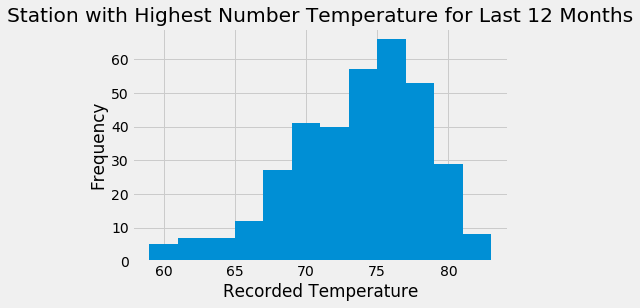

In [180]:
# Choose the station with the highest number of temperature observations.
high_temp = session.query(measurement.station, func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
high_temp = high_temp[0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_latest = session.query(measurement.tobs).\
filter(measurement.station == high_temp).\
filter(measurement.date >= last_data_pt).\
order_by(measurement.date.desc())

temp_latest_df = pd.DataFrame(temp_latest)

plt.hist(temp_latest_df['tobs'], bins=12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station with Highest Number Temperature for Last 12 Months")
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
